In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('SBI-data.csv')

In [3]:
df.head(1)

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2019-03-25,120.0,120.0,117.75,117.75,118.59,413.0,9.0,48978.0,302.0,73.12,2.25,-2.25


In [4]:
l=[x.split('-') for x in df.Date]

In [6]:
l=np.array(l)
df2=pd.DataFrame(l,columns=['Year','Month','NewDate'])

In [7]:
df3=pd.concat([df,df2],axis=1)

In [8]:
df3.head(1)

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Year,Month,NewDate
0,2019-03-25,120.0,120.0,117.75,117.75,118.59,413.0,9.0,48978.0,302.0,73.12,2.25,-2.25,2019,03,25


In [9]:
x_train=df3.loc[:499,["Open","High","Low","Year","Month","NewDate"]]
y_train=df3.iloc[:500,4]

In [10]:
x_test=df3.loc[500:,["Open","High","Low","Year","Month","NewDate"]]
y_test=df3.iloc[500:,4]

In [11]:
x_train=x_train.values
y_train=y_train.values
x_test=x_test.values
y_test=y_test.values

In [12]:
x_test

array([[84.7, 84.7, 84.25, '2016', '12', '22'],
       [85.3, 85.6, 85.3, '2016', '12', '21'],
       [85.5, 85.5, 85.5, '2016', '12', '20'],
       ...,
       [88.2, 88.2, 88.2, '2015', '04', '15'],
       [88.75, 88.75, 88.45, '2015', '04', '09'],
       [84.35, 84.35, 84.15, '2015', '03', '27']], dtype=object)

## Linear Regression

In [30]:
# Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
print('Accuracy', model.score(x_test,y_test))

Accuracy 0.9697286934949917


In [38]:
newe=model.predict([[407.00,404.00,407.95,2019,3,27]])

In [39]:
newe

array([397.87666532])

In [66]:
result=model.predict(x_test)

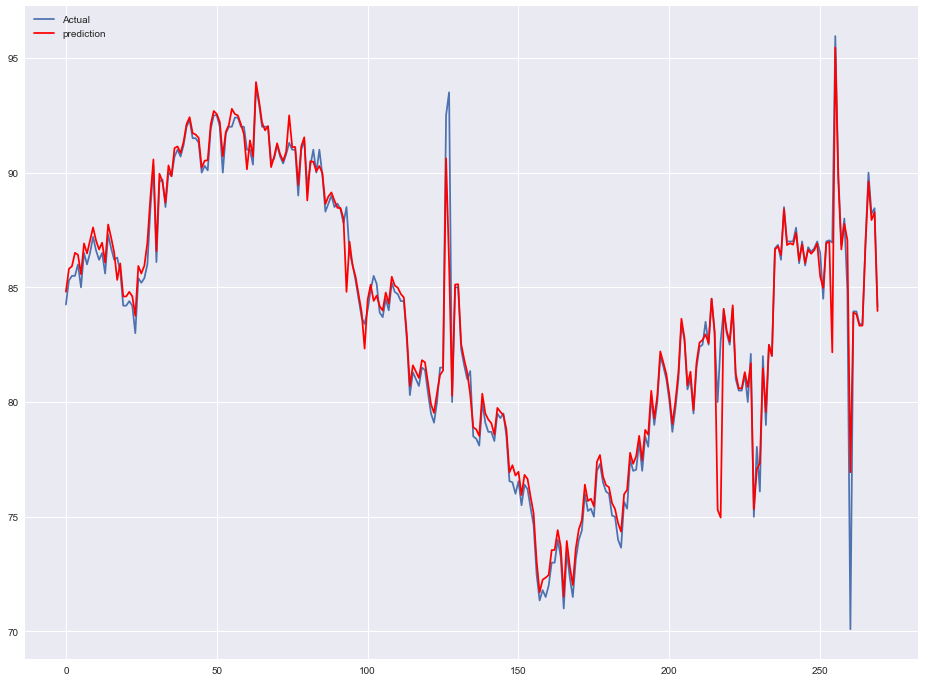

In [71]:
plt.figure(figsize=(16,12))
plt.plot(y_test,label='Actual')
plt.plot(result,color='red',label='prediction')
plt.legend()

## Support Vector Regression

In [73]:
svrmodel=SVR()

In [76]:
svrmodel.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
svrmodel.score(x_test,y_test)

-19.603365563580727

In [79]:
from sklearn.svm import LinearSVR
svrlinearmodel=LinearSVR()

In [85]:
svrlinearmodel.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [86]:
print('Accuracy',svrlinearmodel.score(x_test,y_test))

Accuracy 0.9438317315366729


In [87]:
result1=svrlinearmodel.predict(x_test)

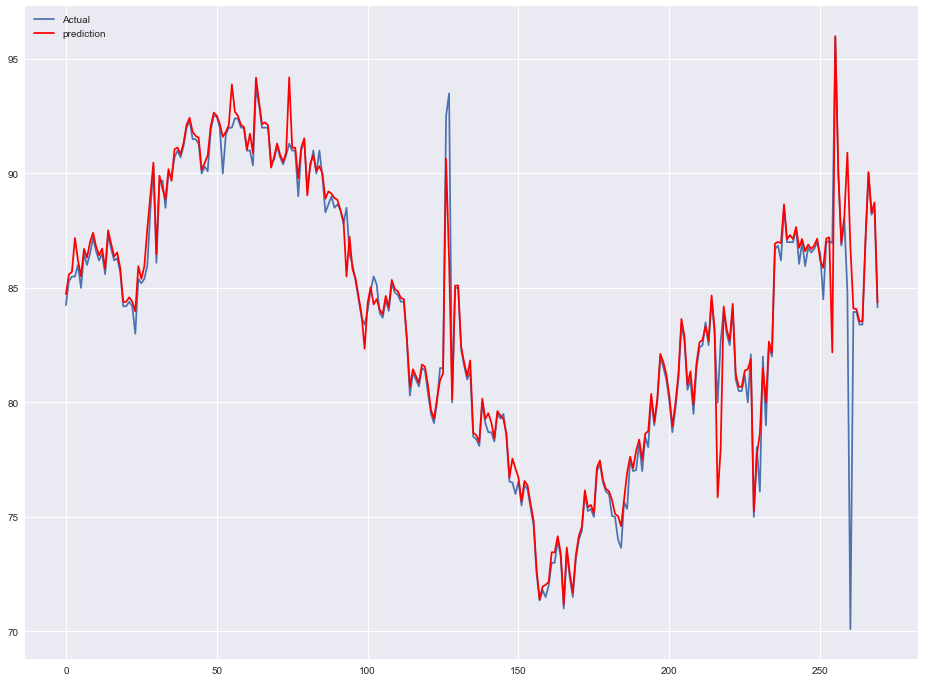

In [88]:
plt.figure(figsize=(16,12))
plt.plot(y_test,label='Actual')
plt.plot(result1,color='red',label='prediction')
plt.legend()

## Polynomial Regression

In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [93]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly_train = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)


In [98]:
nmodel=LinearRegression()
nmodel.fit(x_poly_train,y_train)
print('Accuracy',nmodel.score(x_poly_test,y_test))

Accuracy 0.9363034468003923


In [99]:
result2=nmodel.predict(x_poly_test)

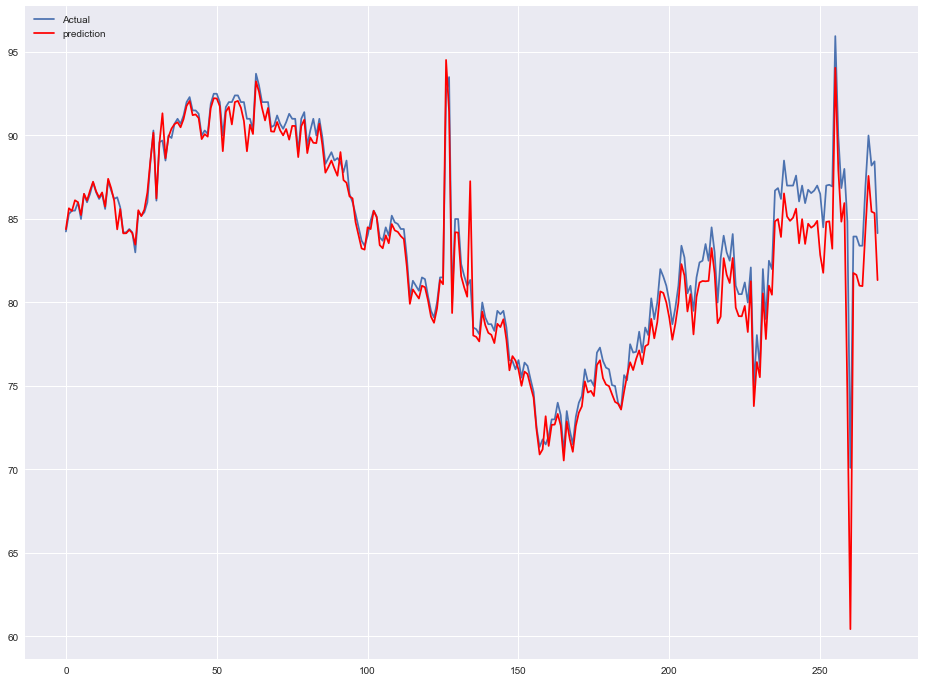

In [100]:
plt.figure(figsize=(16,12))
plt.plot(y_test,label='Actual')
plt.plot(result2,color='red',label='prediction')
plt.legend()

## Decision Tree Regressor

In [101]:
d_model=DecisionTreeRegressor()
d_model.fit(x_poly_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [104]:
print('Accuracy', d_model.score(x_poly_test,y_test))

Accuracy 0.4784901721874708


In [105]:
result3=d_model.predict(x_poly_test)

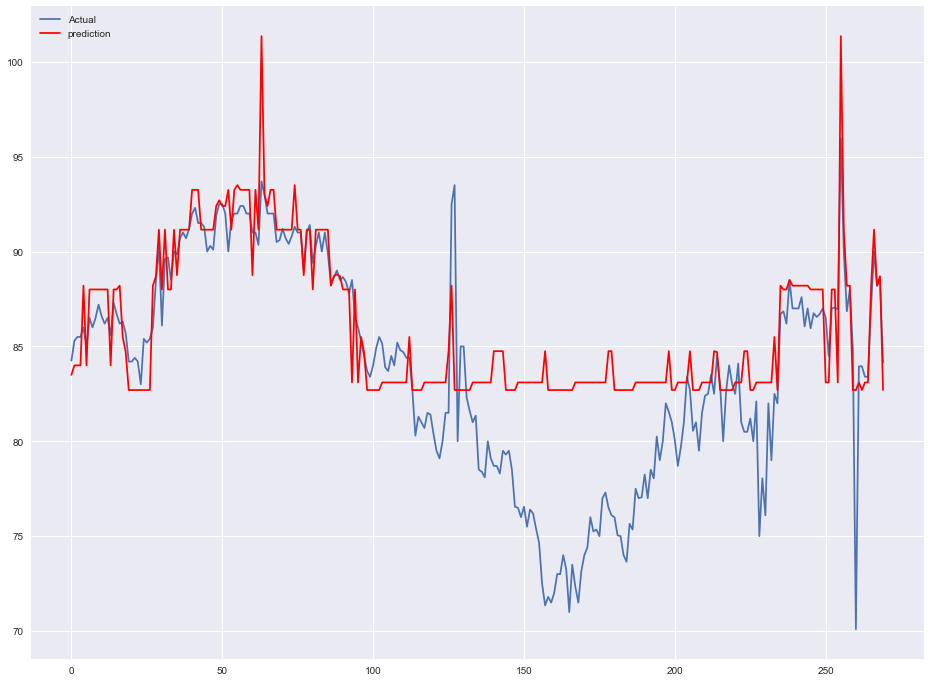

In [106]:
plt.figure(figsize=(16,12))
plt.plot(y_test,label='Actual')
plt.plot(result3,color='red',label='prediction')
plt.legend()